In [ ]:
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import glob
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_dir ="/content/drive/MyDrive/Project/Dataset Plant Disease/fruit-dataset/fruit-dataset/train/"
test_dir="/content/drive/MyDrive/Project/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/"

**Model Training**

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

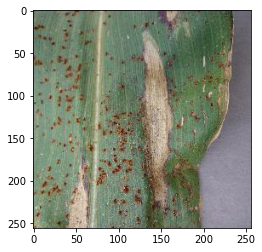

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img1 = load_img('/home/wsuser/work/fruit-dataset/train/Corn_(maize)___Northern_Leaf_Blight/8e0669bb-1959-4f28-b98d-da3c2d85396c___RS_NLB 3678.JPG')
plt.imshow(img1);
#preprocess image
img1 = load_img('/home/wsuser/work/fruit-dataset/train/Corn_(maize)___Northern_Leaf_Blight/8e0669bb-1959-4f28-b98d-da3c2d85396c___RS_NLB 3678.JPG', target_size=(256, 256))
img = img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       train_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
nb_epoch = 10
train=model.fit_generator(train_generator,epochs=nb_epoch,steps_per_epoch=train_generator.samples//batch_size,validation_data=validation_generator,validation_steps=validation_generator.samples // batch_size,verbose=1)


Found 5384 images belonging to 6 classes.


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/tmp/wsuser/ipykernel_165/1747357658.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train=model.fit_generator(train_generator,epochs=nb_epoch,steps_per_epoch=train_generator.samples//batch_size,validation_data=validation_generator,validation_steps=validation_generator.samples // batch_size,verbose=1)


Epoch 1/10
168/168 [==============================] - 387s 2s/step - loss: 0.7843 - accuracy: 0.7081 - val_loss: 0.3770 - val_accuracy: 0.8596
Epoch 2/10
168/168 [==============================] - 384s 2s/step - loss: 0.2932 - accuracy: 0.8967 - val_loss: 0.2068 - val_accuracy: 0.9256
Epoch 3/10
168/168 [==============================] - 383s 2s/step - loss: 0.2222 - accuracy: 0.9215 - val_loss: 0.1901 - val_accuracy: 0.9384
Epoch 4/10
168/168 [==============================] - 382s 2s/step - loss: 0.1730 - accuracy: 0.9408 - val_loss: 0.0830 - val_accuracy: 0.9712
Epoch 5/10
168/168 [==============================] - 382s 2s/step - loss: 0.1519 - accuracy: 0.9496 - val_loss: 0.1207 - val_accuracy: 0.9593
Epoch 6/10
168/168 [==============================] - 383s 2s/step - loss: 0.1692 - accuracy: 0.9494 - val_loss: 0.4358 - val_accuracy: 0.8607
Epoch 7/10
168/168 [==============================] - 379s 2s/step - loss: 0.1622 - accuracy: 0.9436 - val_loss: 0.0665 - val_accuracy: 0.9769

In [ ]:
# Save model
from keras.models import load_model
model.save('fruit.h5')